In [1]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

/Users/gwg/local/dmcm


In [2]:
import random

from   sklearn import manifold, decomposition
from   sklearn import manifold, decomposition

from   scipy.spatial.distance import cdist

import matplotlib
import matplotlib.pyplot as plt
from   matplotlib.offsetbox import OffsetImage, AnnotationBbox

import torch
from   torch.autograd import Variable
from   torchvision.utils import save_image

from   models import load_trained_dmcm_model
from   data.synth.config import SynthConfig
from   data import SynthDataset
import embed

config  = SynthConfig()
dataset = SynthDataset(config)
dir_    = '/Users/gwg/local/dmcm/experiments/20180307_normalizing_z/'\
          'synth_l1_coef-1000.0_lr-0.0001'
fname   = '%s/model.pt' % dir_
model   = load_trained_dmcm_model(config, fname, 'cca', cpu=True)
model   = model.eval()

# Z       = embed.embed(dir_, config, model)
Z       = torch.load('%s/K1.pt' % dir_)

RuntimeError: While copying the parameter named conv_net.fc1.weight, whose dimensions in the model are torch.Size([512, 3072]) and whose dimensions in the checkpoint are torch.Size([400, 3072]).

In [3]:
print('Functions')

# ------------------------------------------------------------------------------

def getdir(l1_coef):
    if l1_coef == 0:
        return '/synth_lr-0.0001'
    else:
        return '/synth_l1_coef-%s_lr-0.0001' % l1_coef

# ------------------------------------------------------------------------------

def imscatter(points, images, colors, ax):
    images = images.numpy()
    colors = colors.numpy()
    for (x, y), image, color in zip(points, images, colors):

        # Set colors back to RGB
        image[0][image[0] == 0] = color[0]
        image[1][image[1] == 0] = 0  # Ignore the green channel. It's just noise.
        image[2][image[2] == 0] = color[2]
        
        im = OffsetImage(image.T, zoom=1)
        ab = AnnotationBbox(im, (x, y), frameon=True, pad=0.4)
        ax.add_artist(ab)

Functions


NameError: name 'Z' is not defined

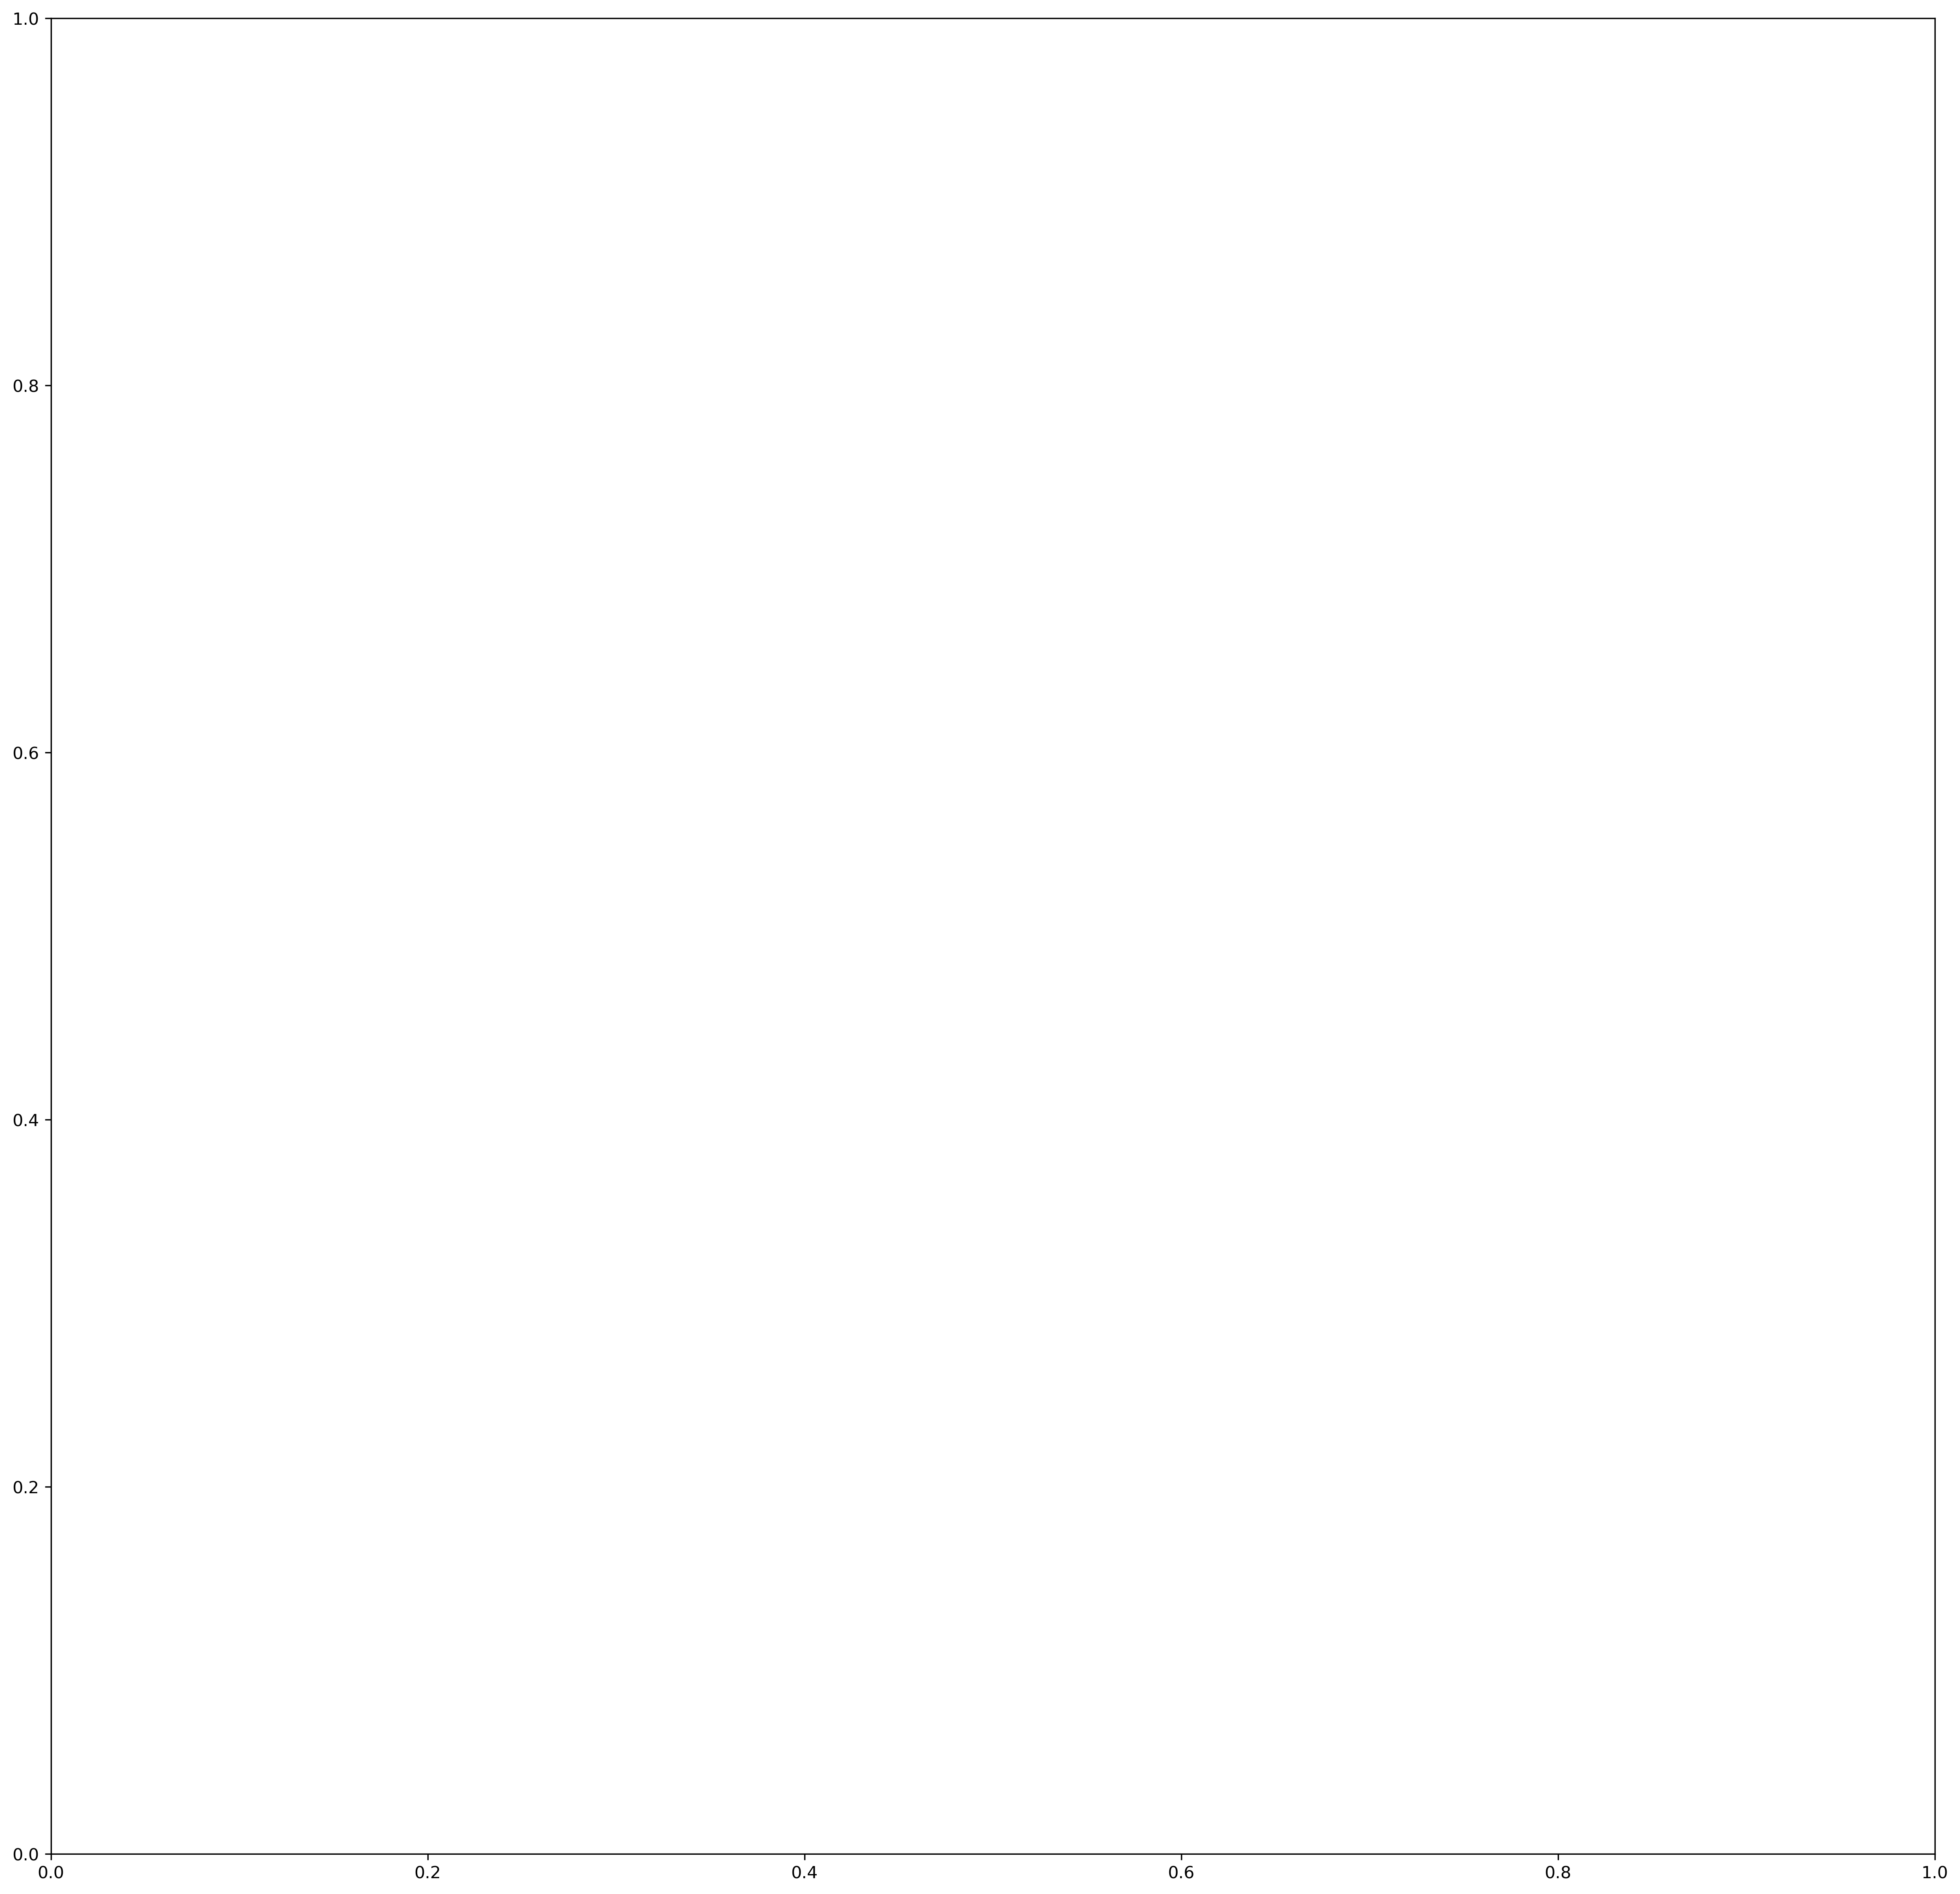

In [3]:
fig, axes = plt.subplots(1, sharex=True, dpi=300)
fig.set_size_inches(20, 20)  # Width, height

# for l1_coef, ax in zip(l1_coefs, axes):
l1_coef = 1000
ax = axes

N = 1000
Z = Z[:N, :]

print('Image embeddings: %s' % str(Z.size()))

# compressor = manifold.TSNE(n_components=2, init='pca', random_state=0)
compressor = decomposition.PCA(n_components=2)
points = compressor.fit_transform(Z)
print('%s completed' % compressor.__class__.__name__)

ax.set_title(l1_coef)
Xp = points[:, 0]
Yp = points[:, 1]
colors = dataset.colors[:N, :3].numpy()

ax.set_xlim([Xp.min().astype(int), Xp.max().astype(int)])
ax.set_ylim([Yp.min().astype(int), Yp.max().astype(int)])

# ax.scatter(Xp, Yp, c=colors)
imscatter(points, dataset.images, dataset.colors, ax)

# plt.legend()
plt.show()